# Tabular models

In [1]:
from fastai.tabular import *
from pathlib import Path

First install kaggle CLI - https://github.com/Kaggle/kaggle-api

Then navigate to your data folder and run the following

`kaggle competitions download -c santander-customer-transaction-prediction`


In [2]:
path = Path('/home/jupyter/.fastai/data/santander')
df = pd.read_csv(path/'train.csv')
df_test = pd.read_csv(path/'test.csv')

In [3]:
dep_var = 'target'
cont_names = df.columns.values[2:]

procs = [FillMissing, Normalize]

In [4]:
data = (TabularList.from_df(df, path=path, cont_names=cont_names, procs=procs)
                           .split_by_rand_pct(0.1)
                           .label_from_df(cols=dep_var)
                            .add_test(TabularList.from_df(df_test, cont_names=cont_names, procs=procs))
                           .databunch())

In [5]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


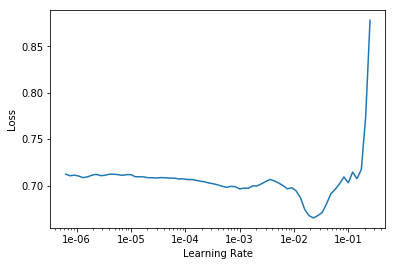

In [6]:
lr_find(learn)
learn.recorder.plot()

In [6]:
np.random.seed(42)
learn.fit(9, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.255093,0.237425,0.912650,00:15
1,0.246948,0.283964,0.910900,00:14
2,0.239236,0.239464,0.912750,00:13
3,0.243129,0.243674,0.911200,00:13
4,0.248897,0.252779,0.913400,00:15
5,0.233468,0.259889,0.911450,00:14
6,0.239896,0.256581,0.910550,00:13
7,0.243175,0.327633,0.912700,00:14
8,0.237193,0.277677,0.913700,00:14


In [20]:
learn.export('production-1.pkl')

## Validation examination

In [15]:
#preds = learn.get_preds()
#pred_tensors = preds[0]
#actual_labels = preds[1].numpy()

#pred_tensors, actual_labels

total_to_test = 20000
correct = 0
for i in range(total_to_test):
    if(pred_tensors[i][0] > 0.5 and actual_labels[i] == 0):
        correct = correct + 1

print(f"{correct}/{total_to_test} correct")

17713/20000 correct


## Test examination

In [24]:
probs = learn.get_preds(ds_type=DatasetType.Test)[0]

def probs2class(item): 
    return max(range(len(item)), key=item.__getitem__) 

test_df = pd.DataFrame({'ID_code': df_test['ID_code'], 'target': list(map(probs2class, probs))})

## Submission

In [25]:
test_df.to_csv('/home/jupyter/transfer/submission-saturday-2.csv', header=True, index=False)